<a href="https://colab.research.google.com/github/jrakhshanda/Bayesian-Methods/blob/master/CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creditcard Fraud Detection Using Decision Trees and Näive Bayes Classifiers**

The datasets contains transactions made by credit cards in September 2013
by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



















In [36]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import tables
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Importing Data and Quality Check**

In [6]:
data = pd.read_csv("creditcard.csv")
data.dropna(inplace = True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6c5adb4e0>,
      dtype=object)

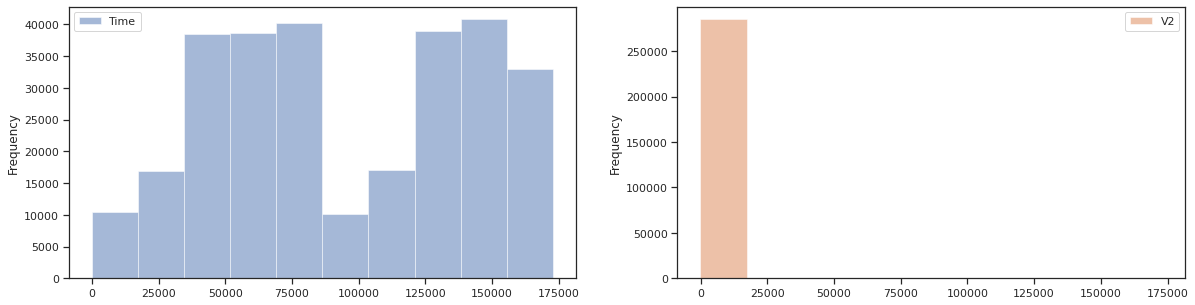

In [37]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
data.iloc[:,[0,2]].plot(kind='hist', subplots=True, ax=axes, alpha=0.5)

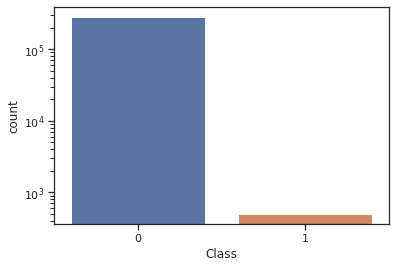

In [88]:
sns.set(style="ticks")
ax=sns.countplot(x='Class',data=data);
ax.set_yscale('log')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [69]:
# This will give us the number of rows and columns in data.
data.shape

(284807, 31)

**Selecting Dependent and Independent Features**

In [ ]:
y = data['Class'].astype('int')
X = data[data.columns[0:30]].astype('float')

**Splitting Data into Train and Test** 

We have divided data into two parts such that the traini data consists of 70% of the original data and testing part consists of the 30% of the data.
We are passing 3 parameters features, target, and test_set size in the function train_test_split().

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

**Buildind Decision Tree Model**

In this section we are creating a decision tree model using skikit-lear. We are classifying our data based on gini index impurities. we trained the model using gini index splitting method.

In [31]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train, y_train)
print(dtc)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [57]:
#Predict the response for train dataset
y_predTrain = dtc.predict(X_train)

**Confusion Matrix of Training dataset**

We are checking the performance of our model on training dataset by the means of misclassification rates of the data.

In [58]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
conf_matTrain = confusion_matrix(y_train, y_predTrain)
print(conf_matTrain)

[[199007      0]
 [     0    357]]


In [62]:
print(metrics.classification_report(y_train,y_predTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199007
           1       1.00      1.00      1.00       357

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



We can see from the above results that precision of our model on training data is 1 this means that we have zero missclassification errors on training data. Now we will check our trained model on testing data.

**Model Evaluation**

Let's estimate, how accurately the classifier or model can predict the type of cultivars.



In [63]:
from sklearn.metrics import confusion_matrix
y_pred = dtc.predict(X_test)

[[85273    35]
 [   37    98]]


**Confusion Matrix of Test Data**

In [64]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[85273    35]
 [   37    98]]


In [65]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.74      0.73      0.73       135

    accuracy                           1.00     85443
   macro avg       0.87      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443

